# Ridge Regression

#### Base purpose is determining the best coefficients by penalizing them.

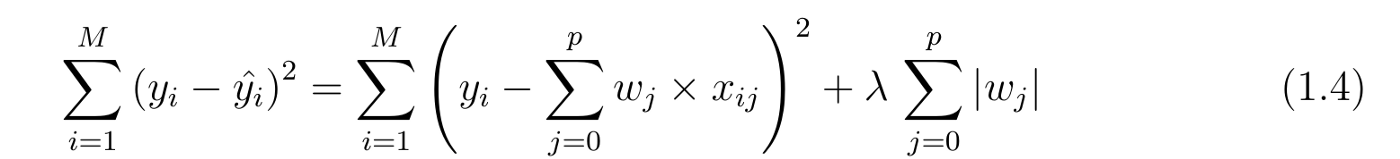

## Features of Ridge Regression

* Resistant to overfitting
* Biased but has low variance
* Better than least squares method when dealing with a lot of parameters
* Better against curse of dimensionality
* More effective against multicollinearity
* Creates model with all variables

## Model

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
hit = pd.read_csv("../../Datasets/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'Division', 'League', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, ms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [22]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [23]:
ridge_model = Ridge(alpha=.1).fit(X_train, y_train)
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

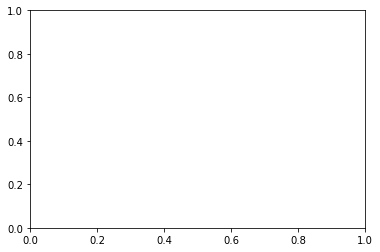

In [25]:
lambda_values = 10**np.linspace(10, -2, 100)*.5

ridge_model = Ridge()
coefs = []

for i in lambda_values:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_)

ax = plt.gca()
ax.plot(lambda_values, coefs)
ax.set_xscale('log')

plt.xlabel("Lambda(Alpha) Values")
